# Feature Detection and Descriptors in Images
This is a tutorial about feature detection and descriptors in images. You will learn that different features are derived from an image. Our final goal is to use these features to do traffic sign detection.
1. Feature detection
1.1 Point-based
Harris corner

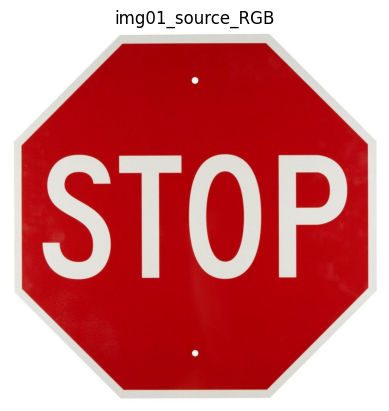

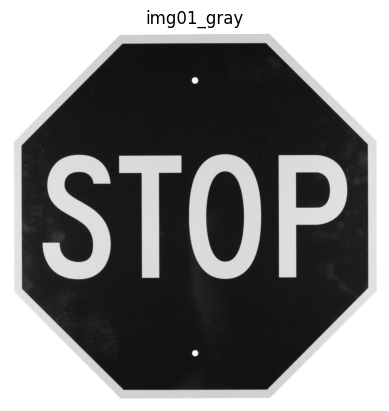

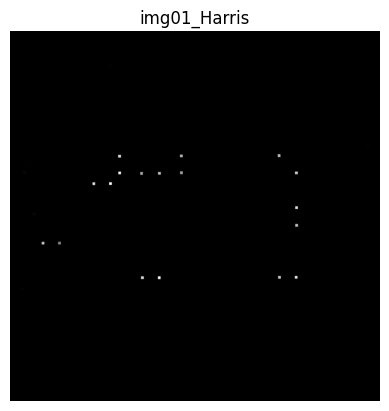

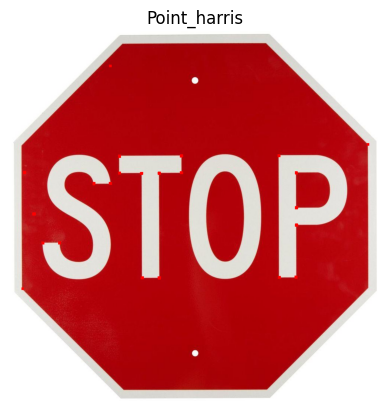

In [11]:
from matplotlib import pyplot as plt
import cv2 
import numpy as np


img01_source = cv2.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/3.jpg") 
img01_source_RGB = cv2.cvtColor(img01_source, cv2.COLOR_BGR2RGB) # Change BGR format to RGB format
#Show
plt.imshow(img01_source_RGB) # plt.imshow(img01_source,cmap=None)
plt.title('img01_source_RGB')
plt.axis('off')
plt.show()

img01_gray = cv2.cvtColor (img01_source_RGB, cv2.COLOR_RGB2GRAY) # Convert RGB color image to gray scale image
#Show
plt.imshow(img01_gray,cmap=plt.cm.gray)
plt.title('img01_gray')
plt.axis('off')
plt.show()


img01_gray = np.float32(img01_gray)
dst = cv2.cornerHarris(img01_gray,2,3,0.04) # Harris corner
dst = cv2.dilate(dst, (),dst,(-1,-1,),3) # result is dilated for marking the corners, not important
#Show
plt.imshow(dst,cmap=plt.cm.gray)
plt.title('img01_Harris')
plt.axis('off')
plt.show()

#Threshold for an optimal value, it may vary depending on the image
img01_source_RGB[dst>0.01*dst.max()]=[255,0,0] # Parameters
plt.show()
plt.imshow(img01_source_RGB)
plt.title('Point_harris')
plt.axis('off')
plt.show()

# 1.2 Edge-based
1.2.1 Roberts, Prewitt, Sobel and Canny

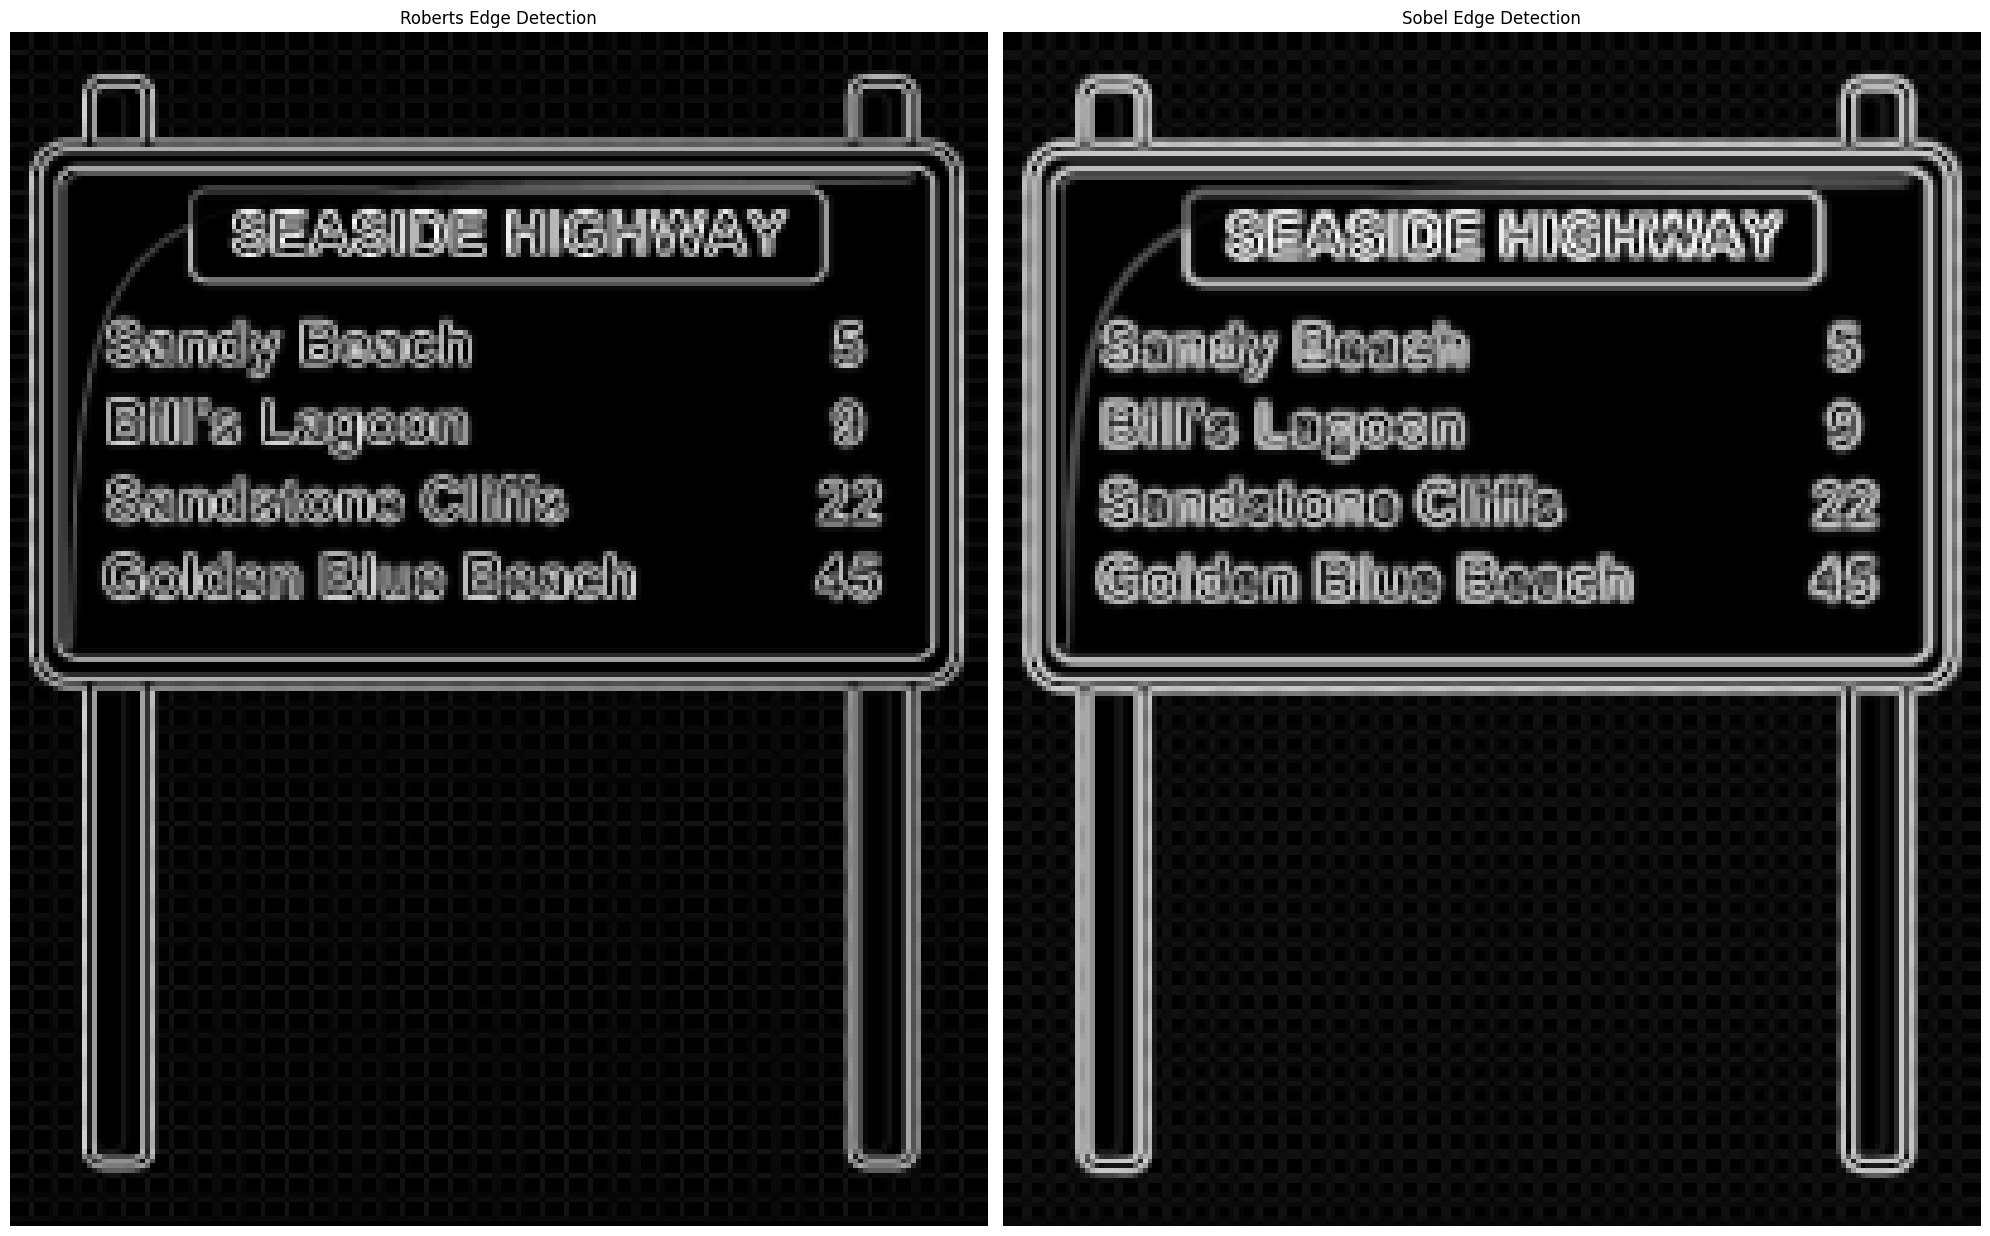

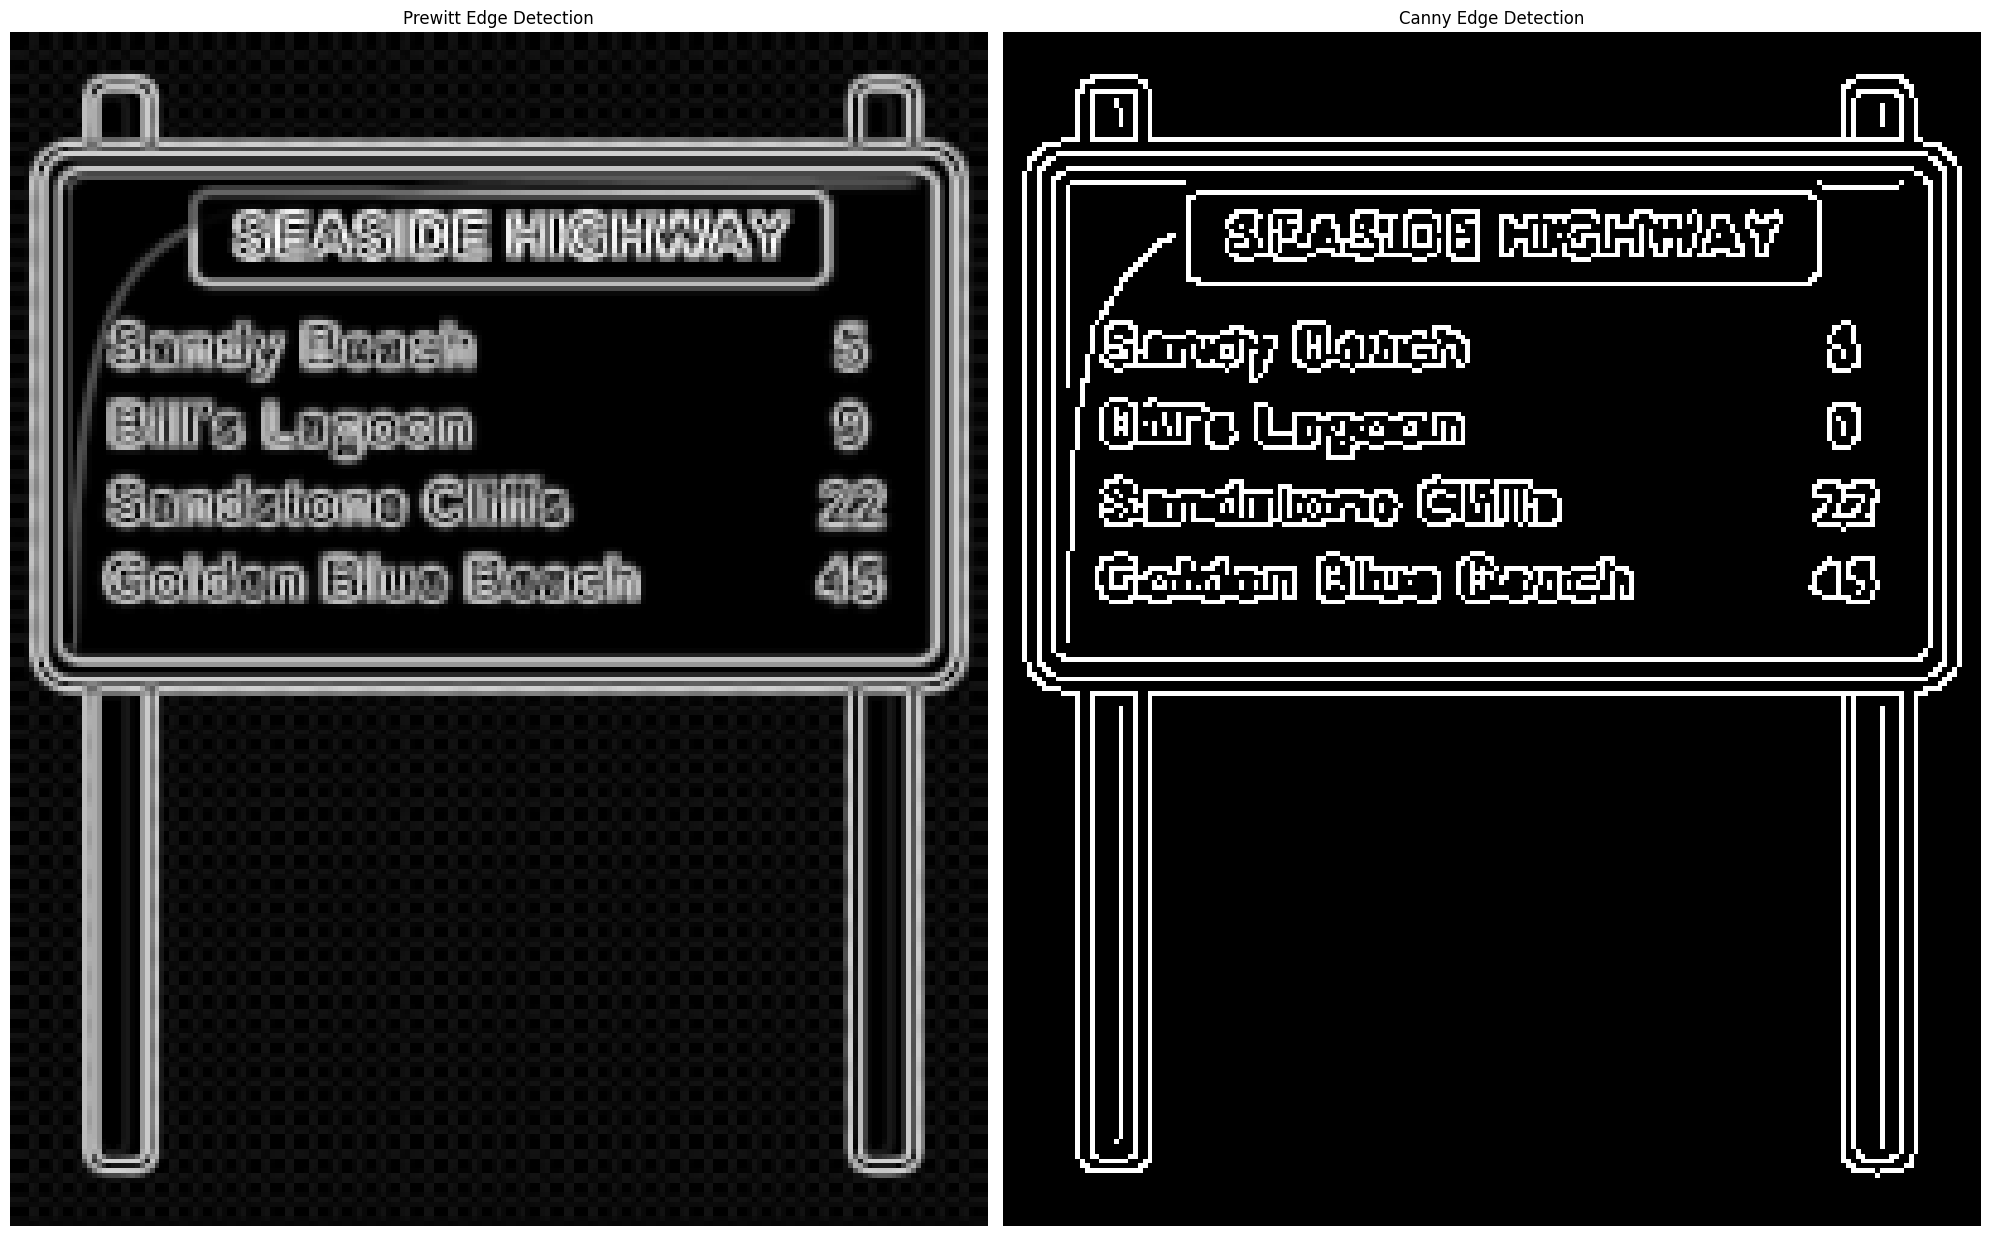

In [13]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import roberts, sobel, prewitt
from skimage import color,io, feature

img = io.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/images.png") # 11.jpg 99.jpg  31.jpg 10.jpg
gray = color.rgb2gray(img)

edge_roberts = roberts(gray)
edge_sobel = sobel(gray)
edge_prewitt = prewitt(gray)
edge_canny=feature.canny(gray) # edge_canny=feature.canny(gray,sigma=3,low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[0].set_title('Prewitt Edge Detection')

ax[1].imshow(edge_canny, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# 1.2.2 Hough detection: line and circle

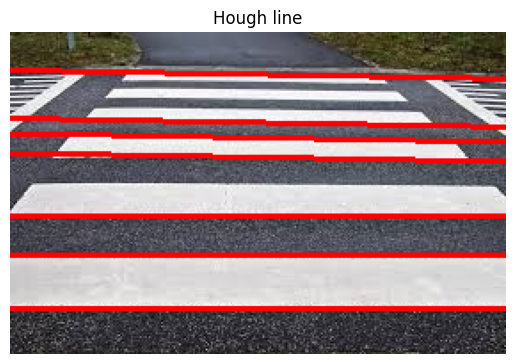

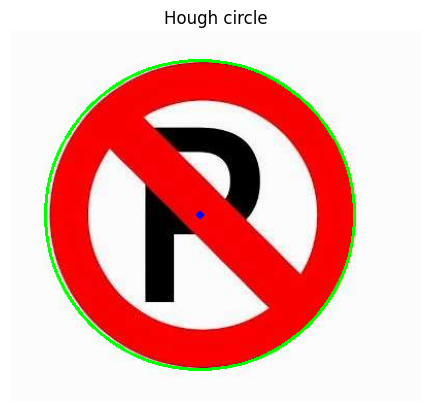

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Hough line detection
img_line = cv2.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/92.jpg") # 4.jpg
gray1 = cv2.cvtColor(img_line,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray1,10,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,150)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 3000*(-b))
        y1 = int(y0 + 3000*(a))
        x2 = int(x0 - 3000*(-b))
        y2 = int(y0 - 3000*(a))
        cv2.line(img_line,(x1,y1),(x2,y2),(0,0,255),2)
#Show
img_line = cv2.cvtColor(img_line,cv2.COLOR_BGR2RGB)
plt.imshow(img_line,cmap=None)
plt.title('Hough line')
plt.axis('off')
plt.show()



### Hough circle detection
img_circle = cv2.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/1.jpg")
img_circle_gray = cv2.cvtColor(img_circle,cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(img_circle_gray,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=150,maxRadius=500)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_circle,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_circle,(i[0],i[1]),2,(255,0,0),3) 
#Show
cimg = cv2.cvtColor(img_circle,cv2.COLOR_BGR2RGB)
plt.imshow(cimg,cmap=None)
plt.title('Hough circle')
plt.axis('off')
plt.show()

# 1.3 Region-based
1.3.1 Threshold: Otsu's and Niblack

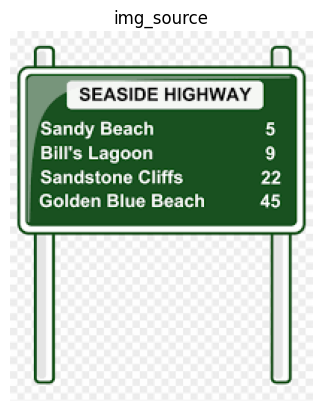

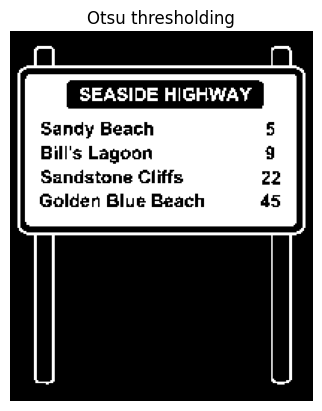

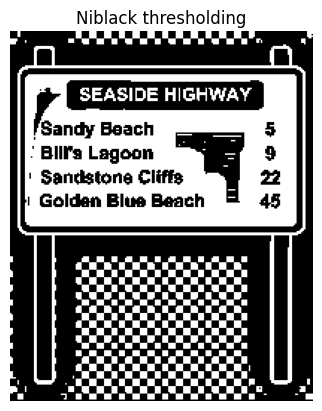

In [19]:
from skimage import  io, color
from skimage.filters import (threshold_otsu, threshold_niblack)
from matplotlib import pyplot as plt
import warnings # ignore warnings in python
warnings.filterwarnings("ignore") 

### Read image and display
img_source = io.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/images.png")
gray = color.rgb2gray(img_source)
#Show
plt.imshow(img_source,cmap=None)
plt.title('img_source')
plt.axis('off')
plt.show()


### Otsu's
thresh_otsu = threshold_otsu(gray)
binary_otsu = gray < thresh_otsu
#Show
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.title('Otsu thresholding')
plt.axis('off')
plt.show()


### Niblack
thresh_niblack = threshold_niblack(gray, window_size =31, k =0.05)
binary_niblack = gray < thresh_niblack
#Show
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack thresholding')
plt.axis('off')
plt.show()

# 1.3.2 Morphology: erosion, dilation, opening and closing

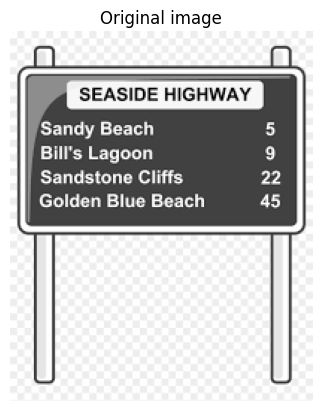

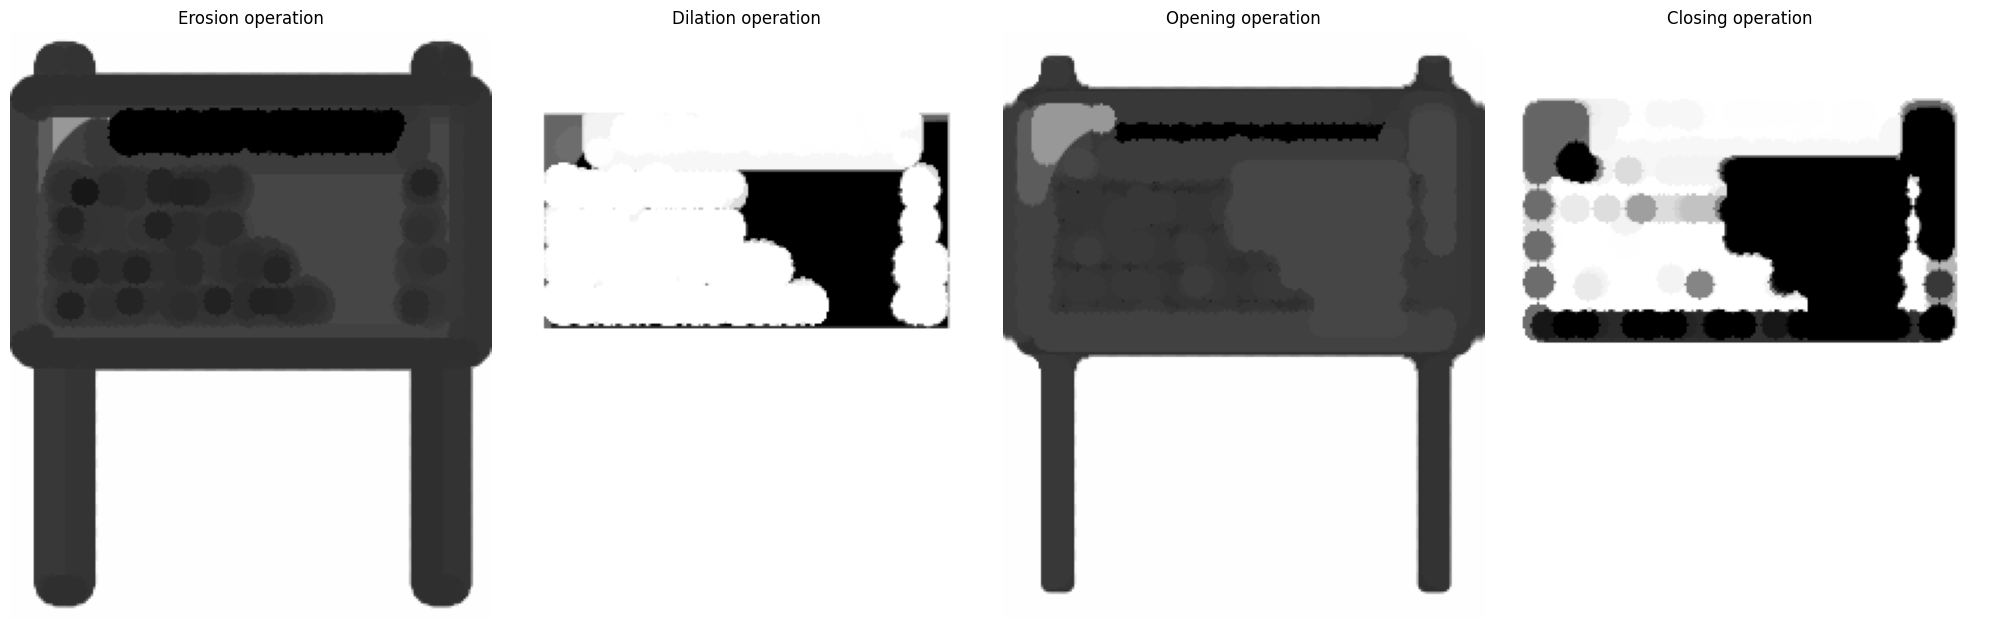

In [20]:
from skimage import io,color,util
from skimage.morphology import erosion, dilation, opening, closing, disk
from matplotlib import pyplot as plt


img_source = io.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/images.png")
gray = color.rgb2gray(img_source)
 #gray = util.invert(gray) # depending on the image let the foreground be white, and background be black
plt.imshow(gray, cmap=plt.cm.gray)
plt.title('Original image')
plt.axis('off')
plt.show()


selem = disk(6)
erosion_img = erosion(gray, selem)
dilated_img = dilation(gray, selem)
opened_img = opening(gray, selem)
closed_img = closing(gray, selem)

#-----------------------Display images-----------------------#
fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(erosion_img, cmap=plt.cm.gray)
ax[0].set_title('Erosion operation')

ax[1].imshow(dilated_img, cmap=plt.cm.gray)
ax[1].set_title('Dilation operation')

ax[2].imshow(opened_img, cmap=plt.cm.gray)
ax[2].set_title('Opening operation')

ax[3].imshow(closed_img, cmap=plt.cm.gray)
ax[3].set_title('Closing operation')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# 2. Color feature
Channel split and Color histogram

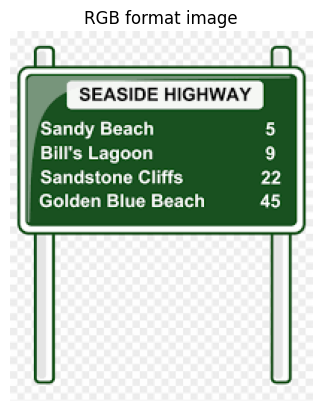

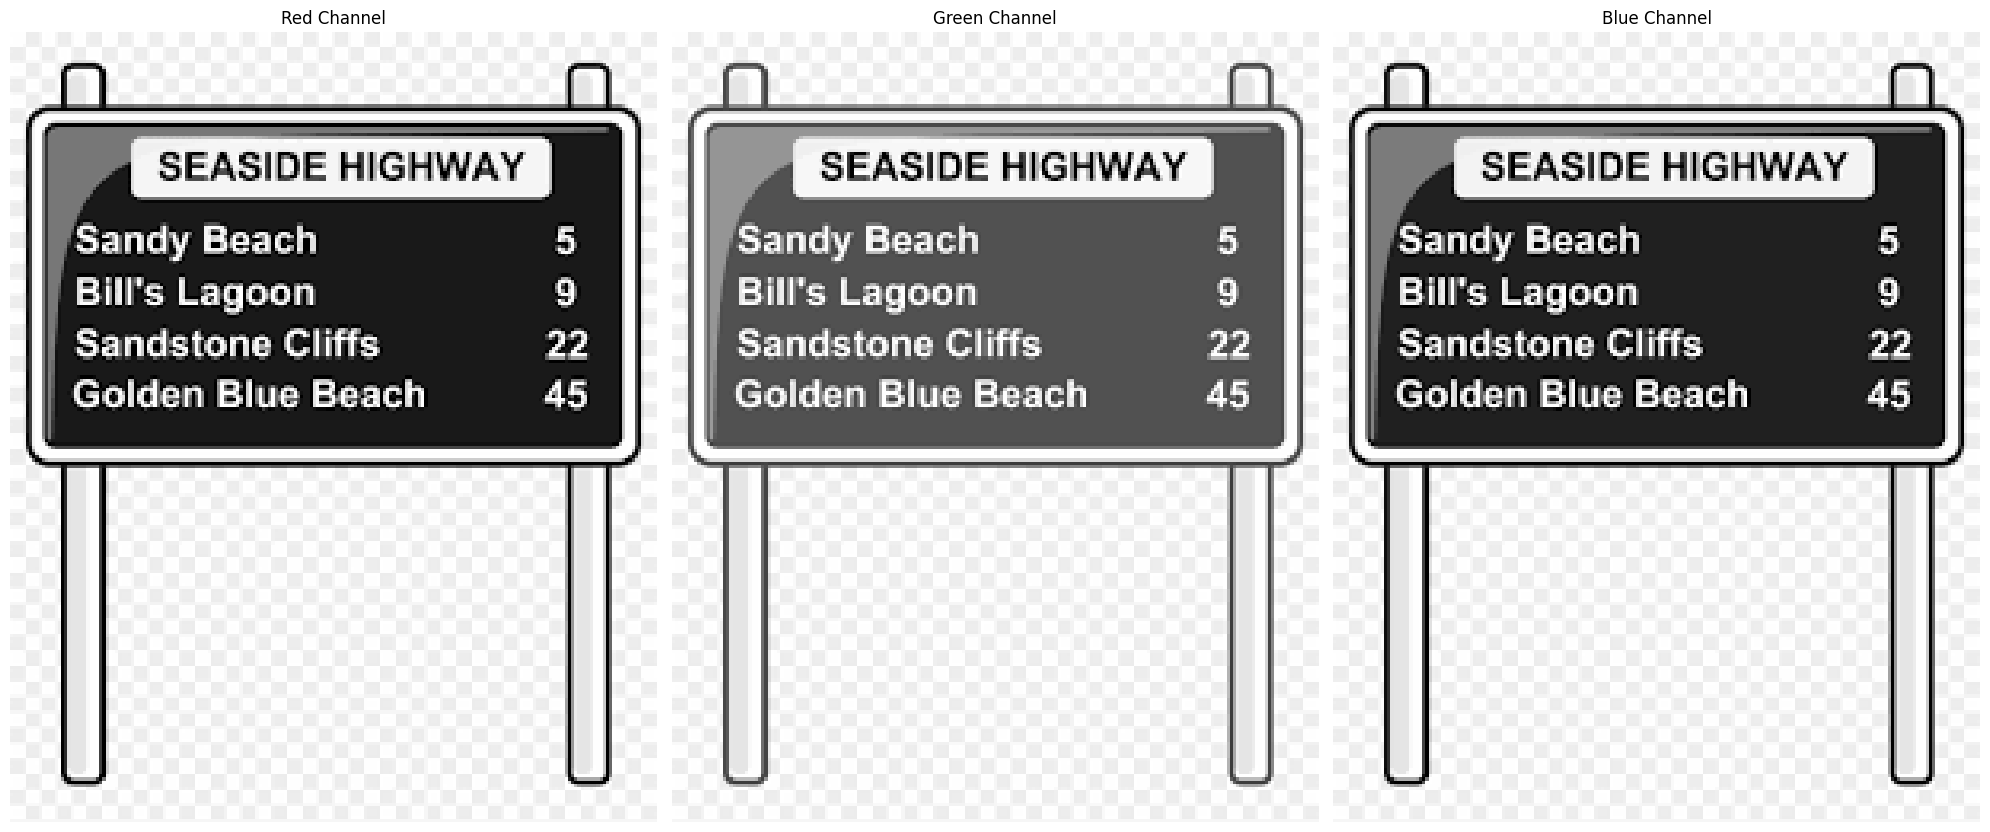

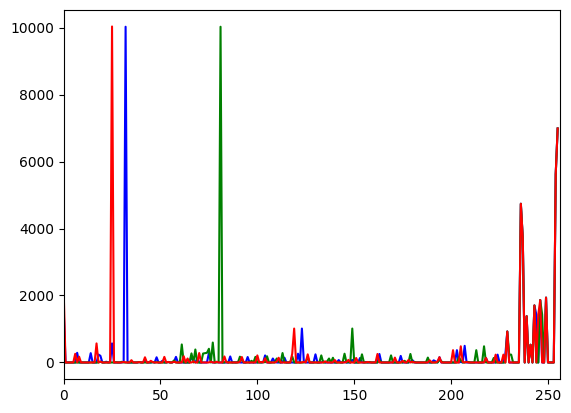

In [21]:
from matplotlib import pyplot as plt
import cv2

img_source = cv2.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/images.png") # OpenCV by default reads images in BGR format
img_source_RGB = cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB) # this is our original image
plt.imshow(img_source_RGB)
plt.title('RGB format image')
plt.axis('off')
plt.show()

### Split channel
r,g,b = cv2.split(img_source_RGB) # or you can use the following commands
# r = img5[:,:,0]
# g = img5[:,:,1]
# b = img5[:,:,2]

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(r, cmap=plt.cm.gray)
ax[0].set_title('Red Channel')

ax[1].imshow(g, cmap=plt.cm.gray)
ax[1].set_title('Green Channel')

ax[2].imshow(b, cmap=plt.cm.gray)
ax[2].set_title('Blue Channel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


### Color histgram
color = ('b','g','r')  ### color RGB image has three channel: Red, Green and Blue. 
for i,col in enumerate(color):
    histr = cv2.calcHist([img_source],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# 3. Texture feature
GLCM (Gray Level Co-occurrence Matrix), Gabor and LBP (Local Binary Pattern)

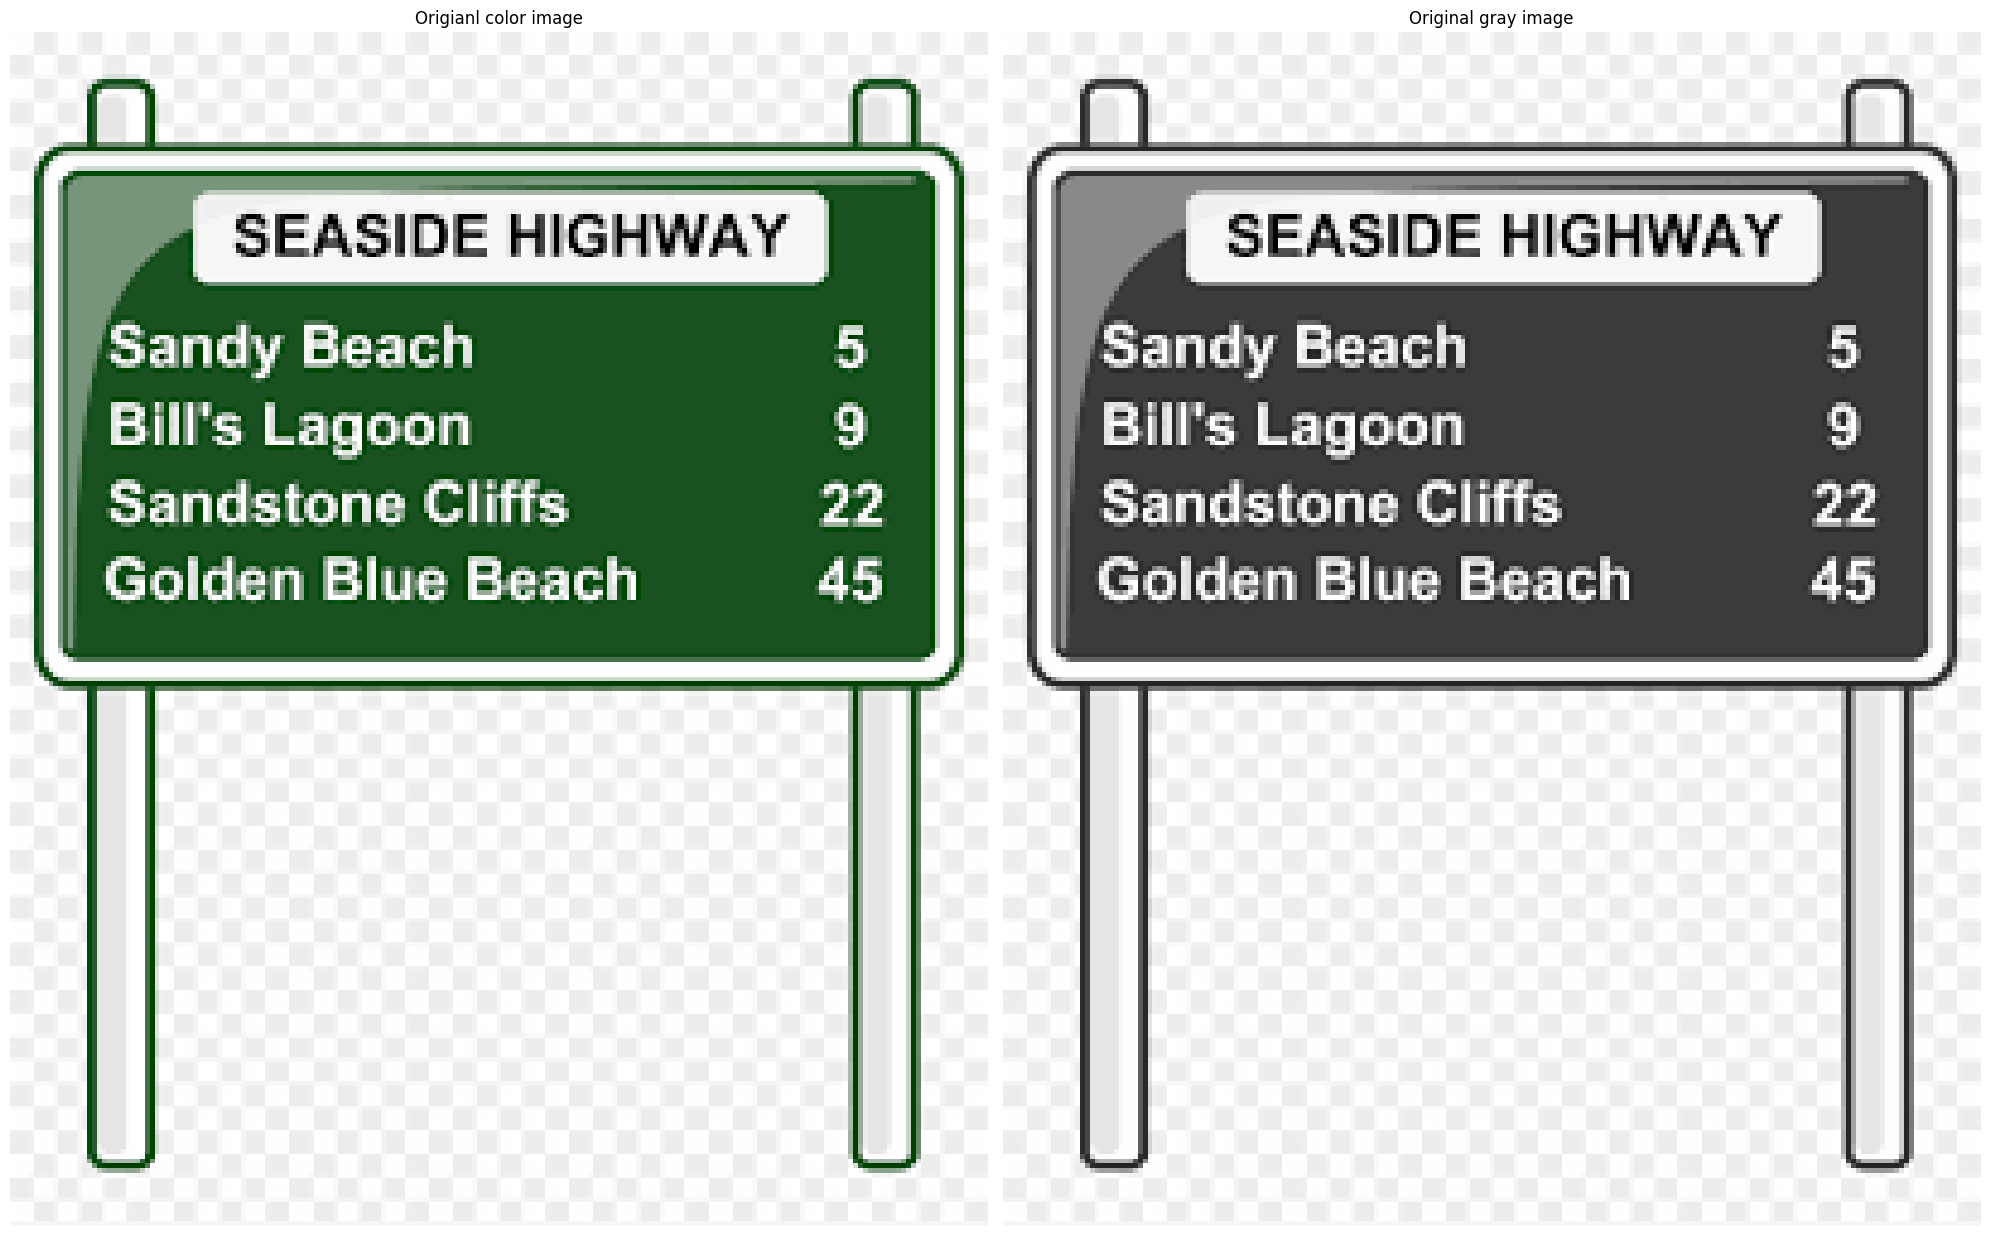

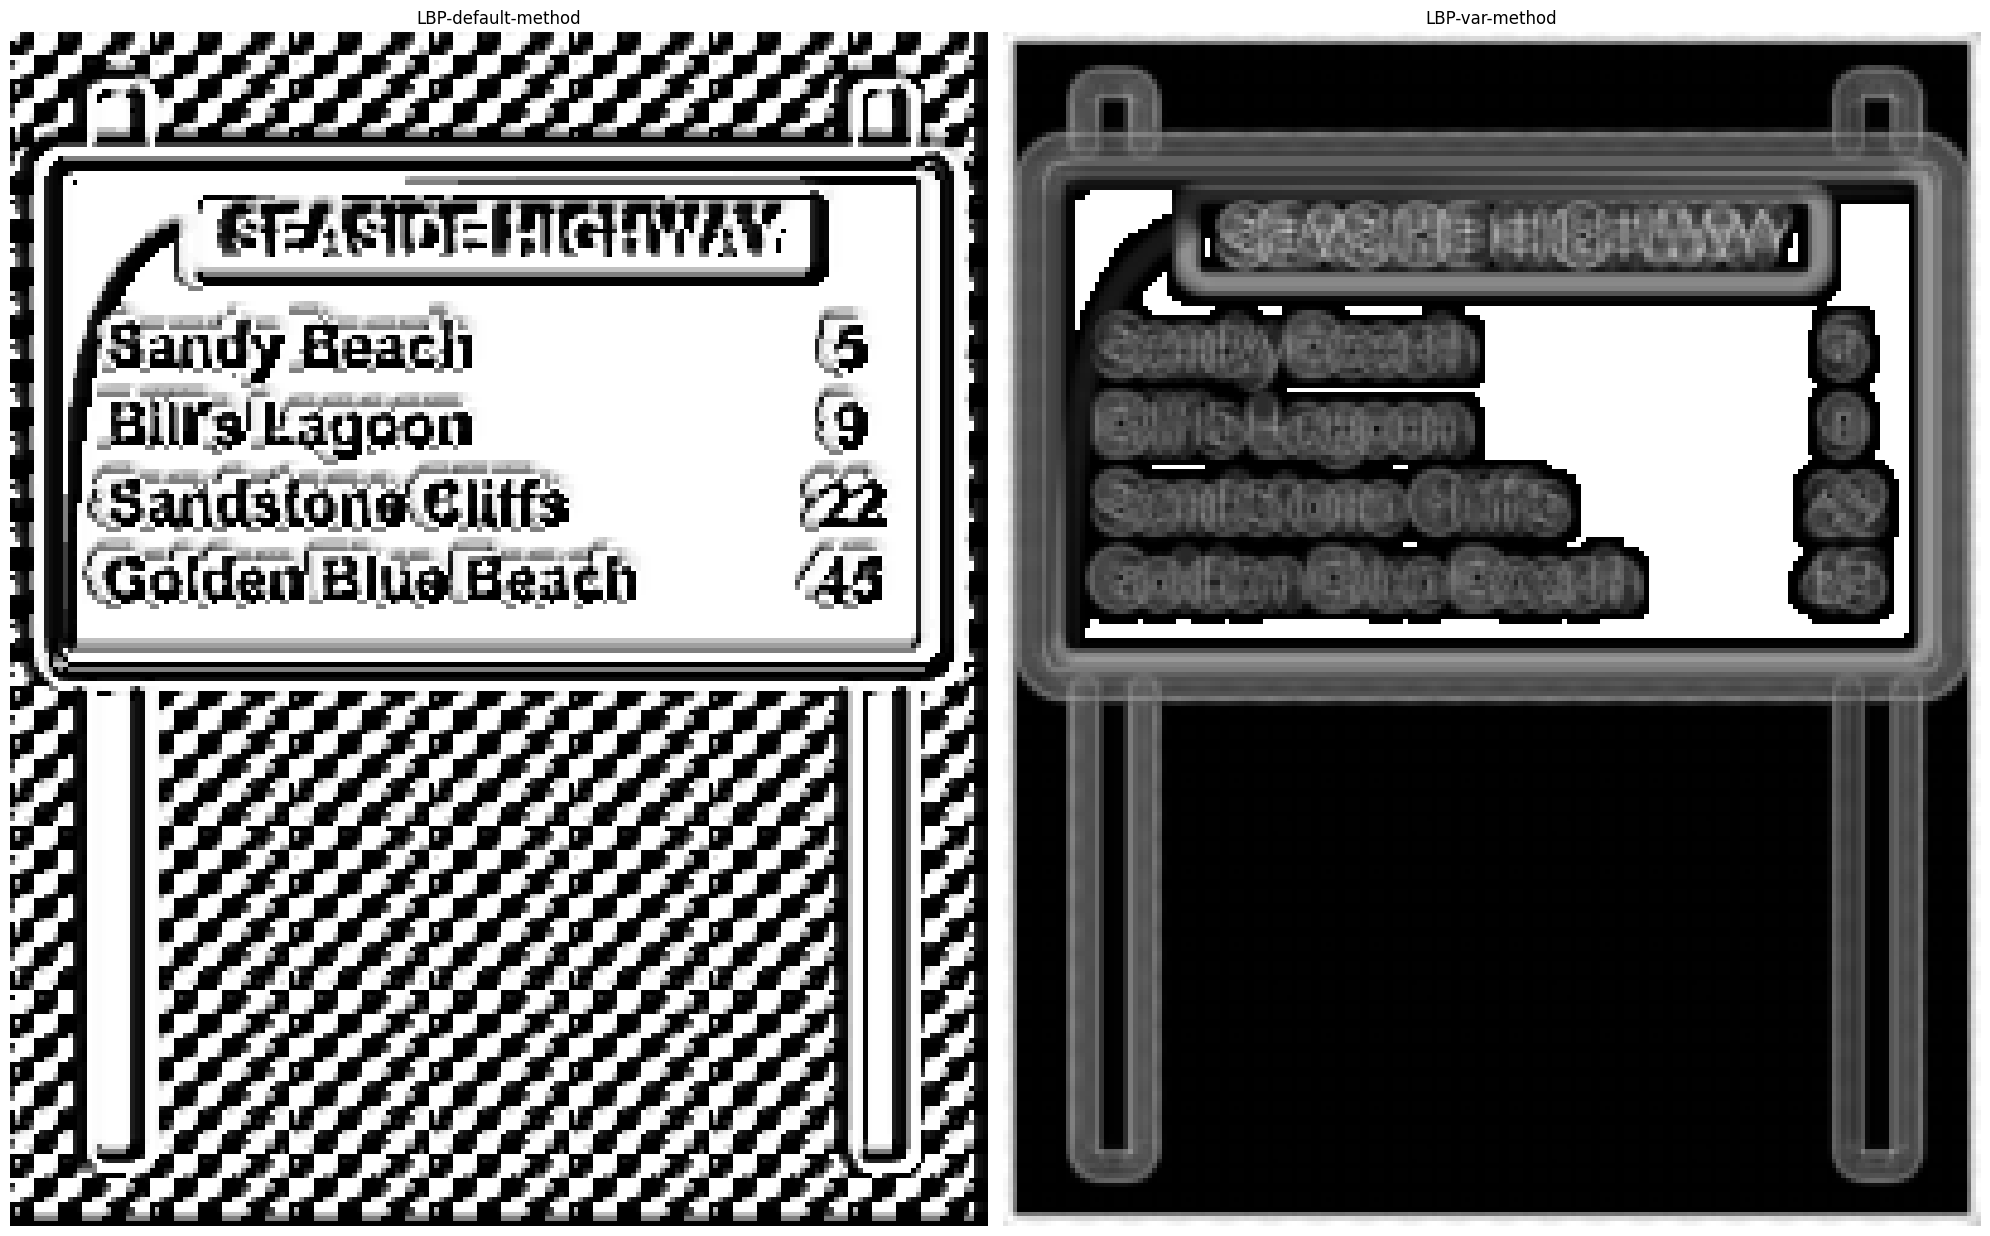

In [22]:
from matplotlib import pyplot as plt
from skimage.feature import local_binary_pattern
import cv2

img_source = cv2.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/images.png") # OpenCV by default reads images in BGR format
img_source_RGB = cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB) # this is our original image
img_gray = cv2.cvtColor(img_source, cv2.COLOR_BGR2GRAY) 

# settings for LBP
radius = 3
n_points = 8 * radius
lbp_default = local_binary_pattern(img_gray, n_points, radius,  method='default')
lbp_var = local_binary_pattern(img_gray, n_points, radius,  method='var')

#-----------------------------Display original images----------------------------------#
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(img_source_RGB, cmap=None)
ax[0].set_title('Origianl color image')

ax[1].imshow(img_gray, cmap=plt.cm.gray)
ax[1].set_title('Original gray image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

#-----------------------------Display LBP images----------------------------------#
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(lbp_default, cmap=plt.cm.gray)
ax[0].set_title('LBP-default-method')

ax[1].imshow(lbp_var, cmap=plt.cm.gray)
ax[1].set_title('LBP-var-method')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# 4. Feature descriptors
SIFT (Scale-Invariant Feature Transform) and SURF (Speeded-Up Robust Features) are good in what they do, but what if you have to pay a few dollars every year to use them in your applications? Yeah, they are patented!!! To solve that problem, OpenCV devs came up with a new "FREE" alternative to SIFT & SURF, and that is ORB (Oriented FAST and Rotated BRIEF).

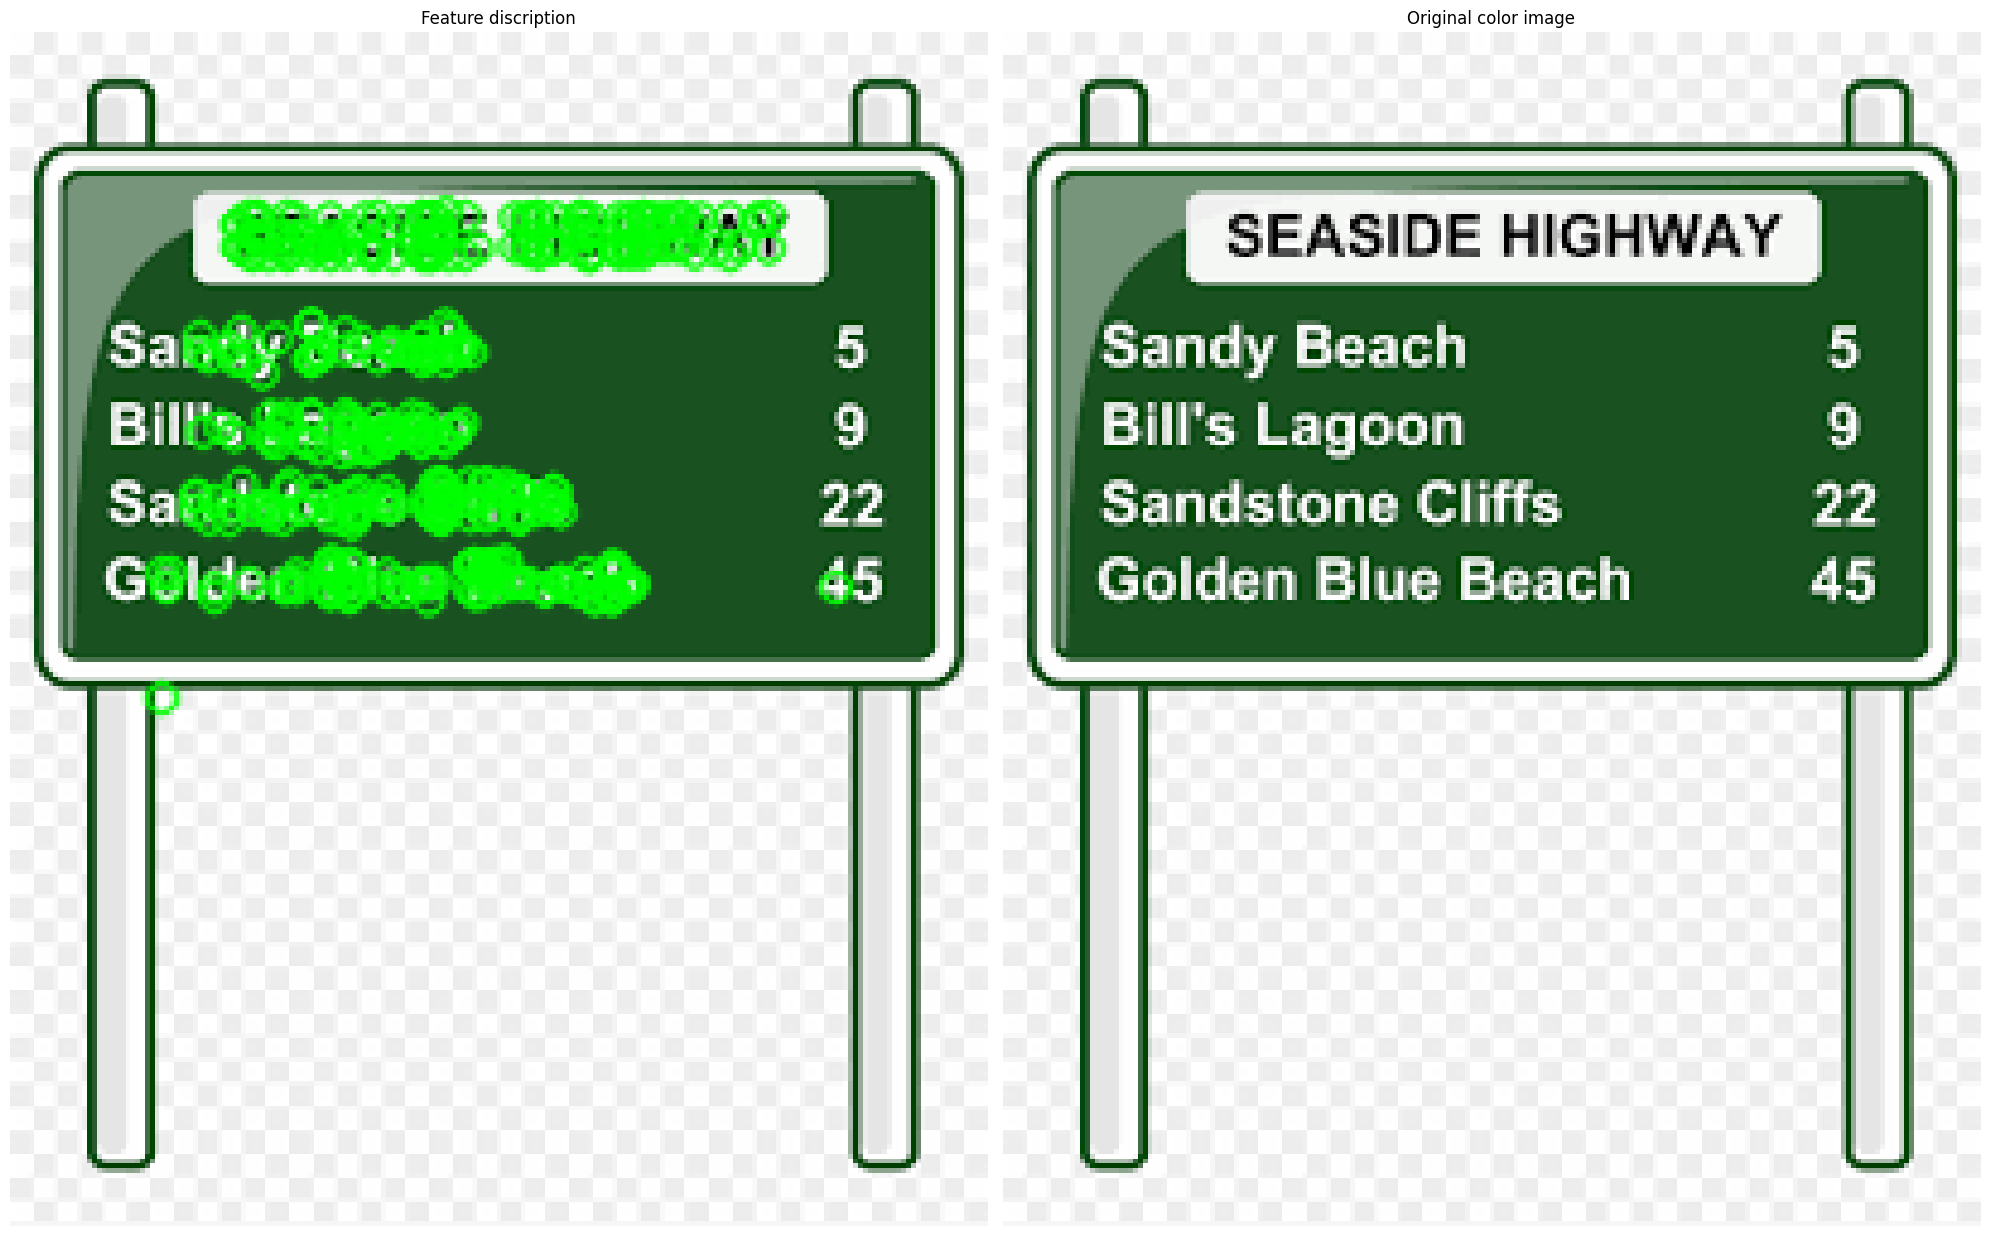

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

img_source = cv2.imread("C:/Users/Hp/Desktop/python_scripts/Opencv_basic/images.png")
img_source_RGB = cv2.cvtColor(img_source,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_source,cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img_gray,None)

# compute the descriptors with ORB
kp, des = orb.compute(img_gray, kp)

# draw only keypoints location,not size and orientation
img_orb = cv2.drawKeypoints(img_source_RGB, kp, None, color=(0,255,0), flags=0)

#-----------------------------Display images----------------------------------#
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(img_orb)
ax[0].set_title('Feature discription')

ax[1].imshow(img_source_RGB)
ax[1].set_title('Original color image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()